In [2]:
import spacy
from collections import Counter
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

In [3]:
df = pd.read_csv(r"../data/processed/top_150_fantasy_reviews_sentiment.csv")
df.head()

,review_id,anime_title,review_url,date,username,user_review_count,is_preliminary,episodes_watched,recommendation,rating,...,review_sentiment,review_nerpos,textblob_polarity,textblob_subjectivity,textblob_label,vader_neg,vader_neu,vader_pos,vader_compound,vader_label
0,503754,Sousou no Frieren,https://myanimelist.net/reviews.php?id=503754,"Oct 13, 2023 8:38 AM",Czekaj,5,True,5/28,Recommended,10,...,with lives so short why do we even bother? to...,"With lives so short, why do we even bother? To...",0.087698,0.506092,neutral,0.068,0.853,0.079,0.8890,positive
1,519189,Sousou no Frieren,https://myanimelist.net/reviews.php?id=519189,"Mar 22, 2024 12:40 PM",chekkit,25,False,NaN,Recommended,10,...,i feel so catered to it feels like an eternit...,I feel so catered to. It feels like an eternit...,0.188848,0.523496,positive,0.051,0.757,0.192,0.9987,positive
2,519472,Sousou no Frieren,https://myanimelist.net/reviews.php?id=519472,"Mar 24, 2024 2:03 AM",Trikkiez,3,False,NaN,Not Recommended,4,...,style frieren does not have its own unique st...,Style- Frieren does not have its own unique st...,-0.000063,0.544437,neutral,0.096,0.782,0.122,0.9958,positive
3,512466,Sousou no Frieren,https://myanimelist.net/reviews.php?id=512466,"Jan 12, 2024 11:25 AM",ShabbaRico,12,True,18/28,Not Recommended,5,...,tl dr 5 10 i do not recommend this for anyon...,"TL;DR: 5/10, I do not recommend this for anyon...",0.074623,0.449968,neutral,0.062,0.823,0.115,0.9991,positive
4,503760,Sousou no Frieren,https://myanimelist.net/reviews.php?id=503760,"Oct 13, 2023 9:10 AM",TheRealist68,16,True,6/28,Mixed Feelings,9,...,through 3 episodes frieren appears to be a un...,"Through 3 episodes, Frieren appears to be a un...",0.136992,0.483176,positive,0.036,0.818,0.146,0.9981,positive


In [ ]:
pos_counter = Counter()
ner_counter = Counter()

for review in tqdm(df["review_nerpos"].dropna().astype(str), desc="Processing reviews"):
    doc = nlp(review)

    pos_counter.update([token.pos_ for token in doc])
    ner_counter.update([ent.label_ for ent in doc.ents])

print("Total POS tag counts:")
print(pos_counter)

print("\nTotal NER label counts:")
print(ner_counter)


Processing reviews:   0%|          | 0/2403 [00:00<?, ?it/s]

In [6]:
# POS
pos_df = pd.DataFrame(pos_counter.items(), columns=["POS", "Count"]).sort_values(by="Count", ascending=False)

# NER
ner_df = pd.DataFrame(ner_counter.items(), columns=["Entity", "Count"]).sort_values(by="Count", ascending=False)

/tmp/ipykernel_319645/3514247641.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pos_df, x="POS", y="Count", palette="viridis")


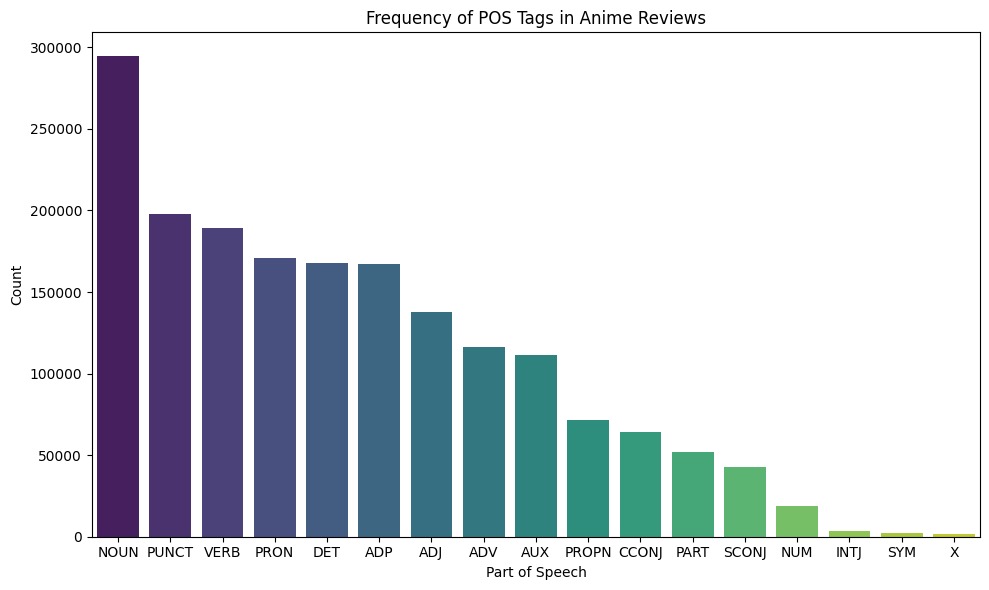

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(data=pos_df, x="POS", y="Count", palette="viridis")
plt.title("Frequency of POS Tags in Anime Reviews")
plt.xlabel("Part of Speech")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


/tmp/ipykernel_319645/1096900358.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ner_df, y="Entity", x="Count", palette="magma")


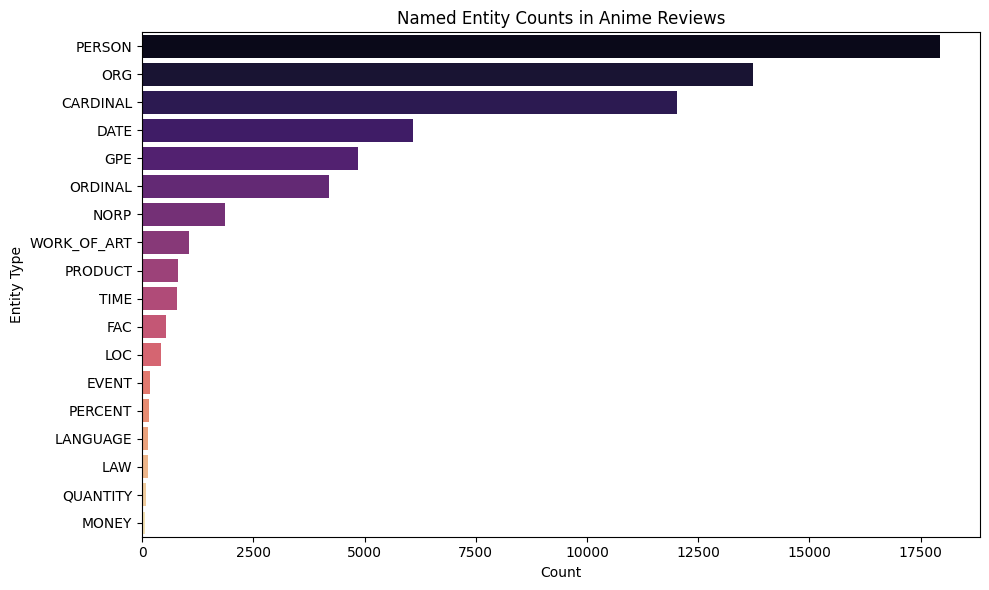

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(data=ner_df, y="Entity", x="Count", palette="magma")
plt.title("Named Entity Counts in Anime Reviews")
plt.xlabel("Count")
plt.ylabel("Entity Type")
plt.tight_layout()
plt.show()


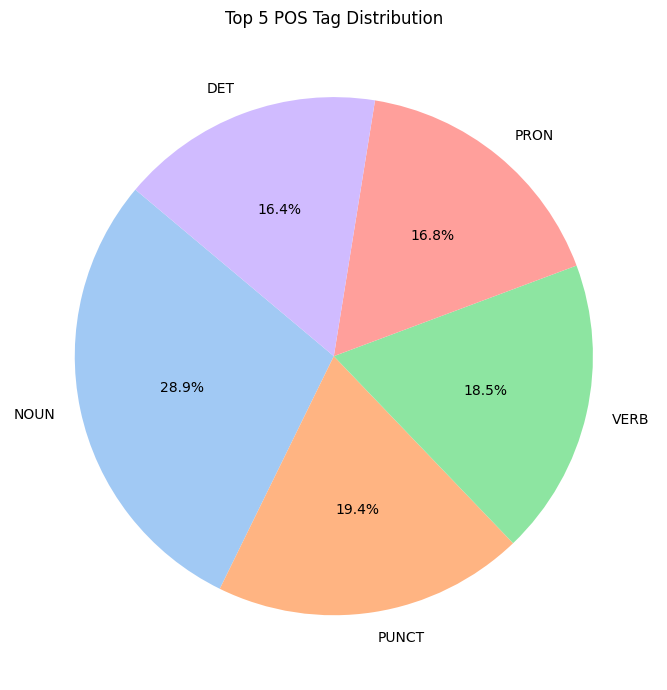

In [9]:
top5_pos = pos_df.head(5)

plt.figure(figsize=(7, 7))
plt.pie(top5_pos["Count"], labels=top5_pos["POS"], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Top 5 POS Tag Distribution")
plt.tight_layout()
plt.show()


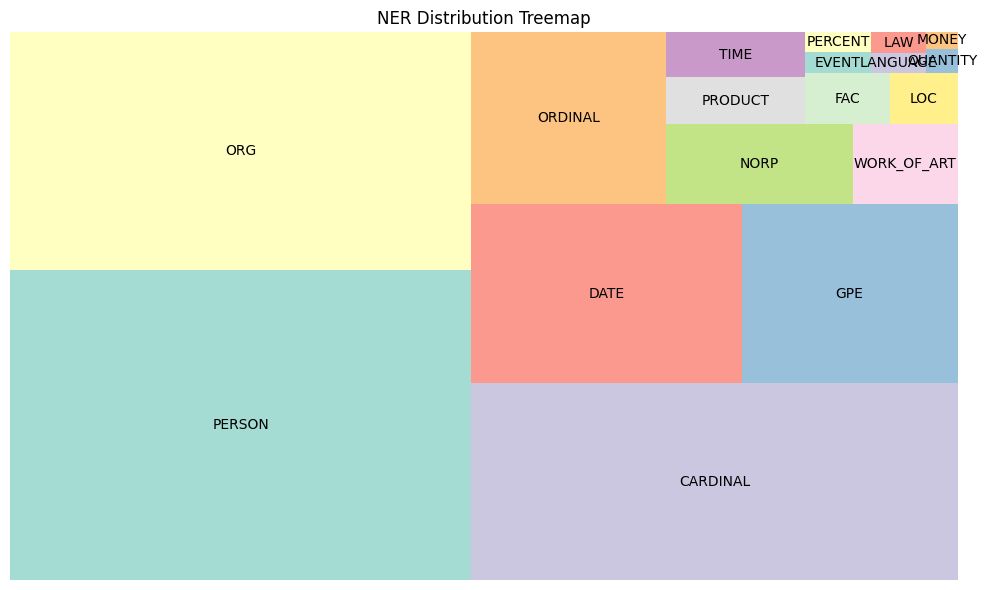

In [11]:
plt.figure(figsize=(10, 6))
squarify.plot(sizes=ner_df["Count"], label=ner_df["Entity"], alpha=.8, color=sns.color_palette("Set3", len(ner_df)))
plt.title("NER Distribution Treemap")
plt.axis('off')
plt.tight_layout()
plt.show()

In [1]:
text = df.loc[15, "review_nerpos"]
doc = nlp(text)

# Render to raw HTML
html = displacy.render(doc, style="ent", jupyter=False)

# Save to HTML file
with open("ner_visualization.html", "w", encoding="utf-8") as f:
    f.write(html)


NameError: name 'df' is not defined